In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('data/global_disaster_response_2018_2024.csv')
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [111]:
df.isna().sum()

date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
dtype: int64

In [112]:
df.dtypes

date                          object
country                       object
disaster_type                 object
severity_index               float64
casualties                     int64
economic_loss_usd            float64
response_time_hours          float64
aid_amount_usd               float64
response_efficiency_score    float64
recovery_days                  int64
latitude                     float64
longitude                    float64
dtype: object

In [113]:
df.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.000000,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.015769,100.591140,5.068593e+06,12.183027,2.500003e+05,87.574025,49.682560,0.231205,0.089889
std,1.942843,65.052064,3.268541e+06,9.259081,1.432275e+05,10.188961,20.098944,34.759662,98.380208
min,1.000000,0.000000,5.273900e+02,1.000000,1.660000e+01,29.750000,2.000000,-59.994000,-169.998000
25%,3.660000,51.000000,2.585513e+06,6.270000,1.429663e+05,83.060000,36.000000,-29.848250,-85.551750
50%,4.990000,91.000000,4.548351e+06,10.510000,2.305365e+05,89.180000,49.000000,0.267500,0.390500
75%,6.340000,138.000000,6.950615e+06,15.450000,3.352259e+05,94.700000,63.000000,30.488250,85.665000
max,10.000000,524.000000,2.445624e+07,63.100000,1.126465e+06,100.000000,112.000000,59.997000,169.999000


In [114]:
df.disaster_type.unique()

array(['Earthquake', 'Extreme Heat', 'Hurricane', 'Wildfire', 'Flood',
       'Storm Surge', 'Drought', 'Tornado', 'Landslide',
       'Volcanic Eruption'], dtype=object)

In [115]:
df.country.unique()

array(['Brazil', 'India', 'Indonesia', 'United States', 'France',
       'Germany', 'Greece', 'Spain', 'Mexico', 'South Africa',
       'Philippines', 'Nigeria', 'Japan', 'Canada', 'Italy', 'Australia',
       'China', 'Bangladesh', 'Chile', 'Turkey'], dtype=object)

So far we know
1. severity_index max value is 10 and min is 1
2. 10 disaster types recorded in the dataset
3. 20 countries recorded in dataset

### convert date to date time data type

In [116]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                         datetime64[ns]
country                              object
disaster_type                        object
severity_index                      float64
casualties                            int64
economic_loss_usd                   float64
response_time_hours                 float64
aid_amount_usd                      float64
response_efficiency_score           float64
recovery_days                         int64
latitude                            float64
longitude                           float64
dtype: object

### check for duplicates

In [117]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

### Feature understanding

#### Questions

1. How many disaster events are recorded
2. What disaster type is most common
3. How do disaster frequency change from 2018 - 2024
4. are certain months prone to disasters
5. Year with the highest severity_index
6. What county experienced the most disasters

In [118]:
df['disaster_type'].value_counts()

disaster_type
Landslide            5130
Earthquake           5068
Flood                5039
Hurricane            5002
Extreme Heat         5001
Storm Surge          4988
Volcanic Eruption    4983
Wildfire             4954
Tornado              4939
Drought              4896
Name: count, dtype: int64

[]

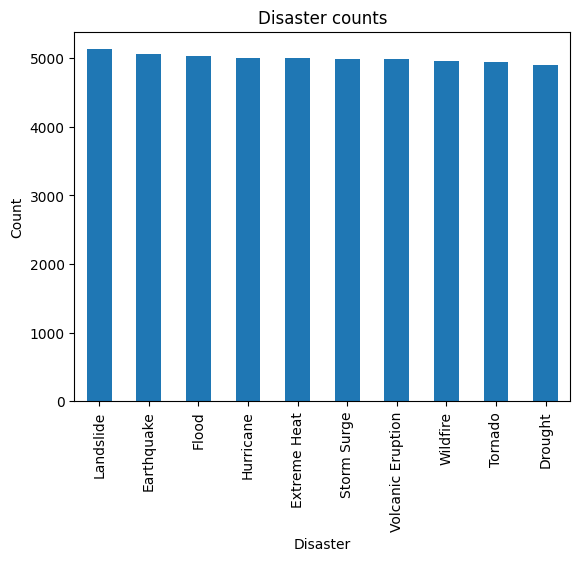

In [119]:
ax = df['disaster_type'].value_counts().plot(kind='bar',title='Disaster counts')
ax.set_xlabel('Disaster')
ax.set_ylabel('Count')
plt.plot()

The most common disaster type is landslide

In [120]:
df['year'] = df['date'].dt.year

In [121]:
df.groupby('year')['disaster_type'].count().sort_values(ascending=False)

year
2021    7271
2020    7247
2023    7139
2022    7130
2019    7113
2024    7086
2018    7014
Name: disaster_type, dtype: int64

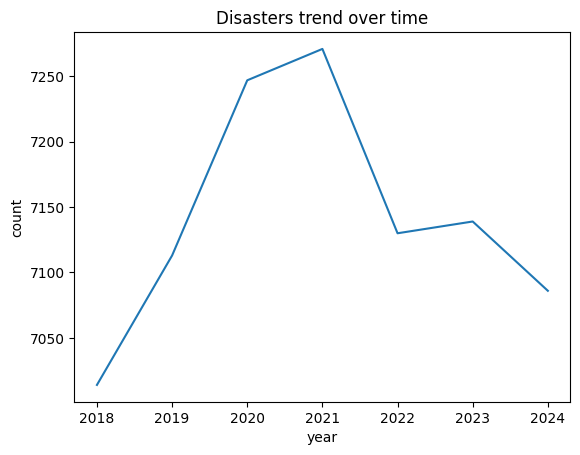

In [122]:
ax = df.groupby('year')['disaster_type'].count().plot(kind='line',title='Disasters trend over time')
ax.set_ylabel('count')
plt.show()

Disaster rise from 2018 up till 2021, where we see a steady declination till 2022, and then goes down again till 2024

In [123]:
df['months'] = df['date'].dt.month_name()

In [124]:
df.groupby('months')['disaster_type'].count().sort_values(ascending=False)

months
January      4318
August       4252
October      4244
July         4233
March        4207
June         4205
May          4195
December     4193
November     4124
April        4108
September    4067
February     3854
Name: disaster_type, dtype: int64

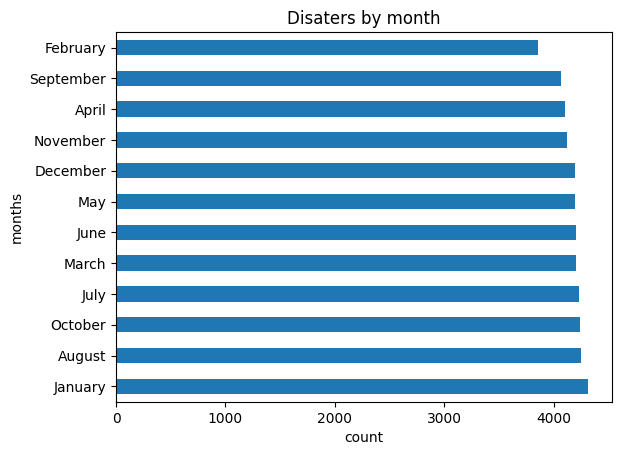

In [125]:
ax = df.groupby('months')['disaster_type'].count().sort_values(ascending=False).plot(kind='barh', title='Disaters by month')
ax.set_xlabel('count')
plt.show()

January has the highest disaster count, but disaster seem to be evenly distributed across months

In [126]:
df.groupby('year')['severity_index'].sum().sort_values(ascending=False)

year
2020    36611.80
2021    36262.44
2023    35758.87
2024    35649.96
2019    35628.21
2022    35589.91
2018    35287.24
Name: severity_index, dtype: float64

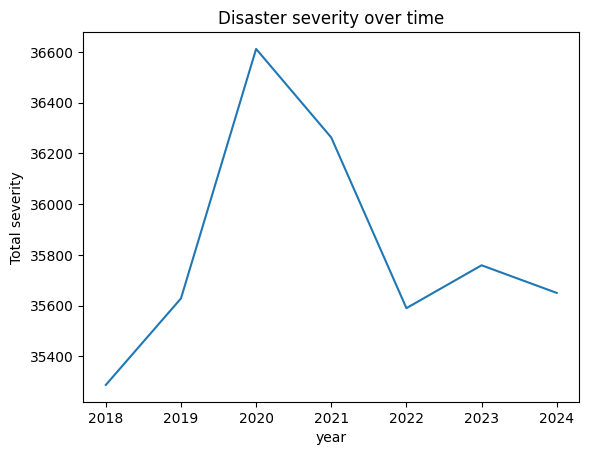

In [127]:
ax = df.groupby('year')['severity_index'].sum().plot(kind='line',title='Disaster severity over time')
ax.set_ylabel('Total severity')
plt.show()

2020 has the highest number of severity.

2020 was year to covid 19 pandemic 

In [128]:
df.groupby('country')['disaster_type'].count().sort_values(ascending=False)

country
Brazil           2591
Australia        2563
Turkey           2554
Bangladesh       2553
Spain            2543
China            2539
Chile            2529
Nigeria          2528
Germany          2526
India            2509
Greece           2503
Italy            2503
South Africa     2497
Japan            2472
Indonesia        2467
Canada           2438
Philippines      2437
Mexico           2433
United States    2413
France           2402
Name: disaster_type, dtype: int64

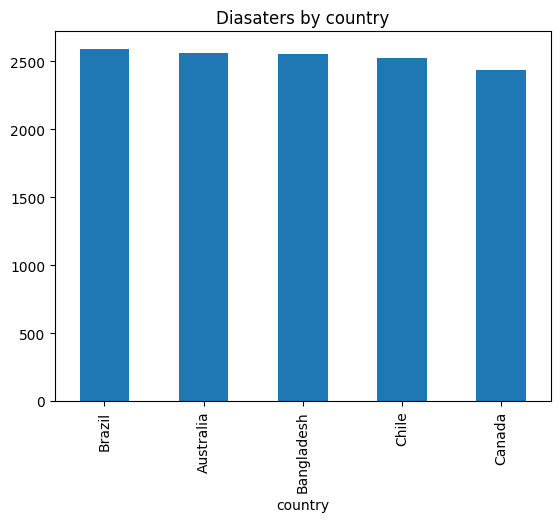

In [130]:
df.groupby('country')['disaster_type'].count().head(5).sort_values(ascending=False).plot(kind='bar',title='Diasaters by country')
plt.show()